# Machine Learning Ex1

### Libraries

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Configuration

In [29]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

## Data Loading

In [30]:
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [31]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<Axes: >

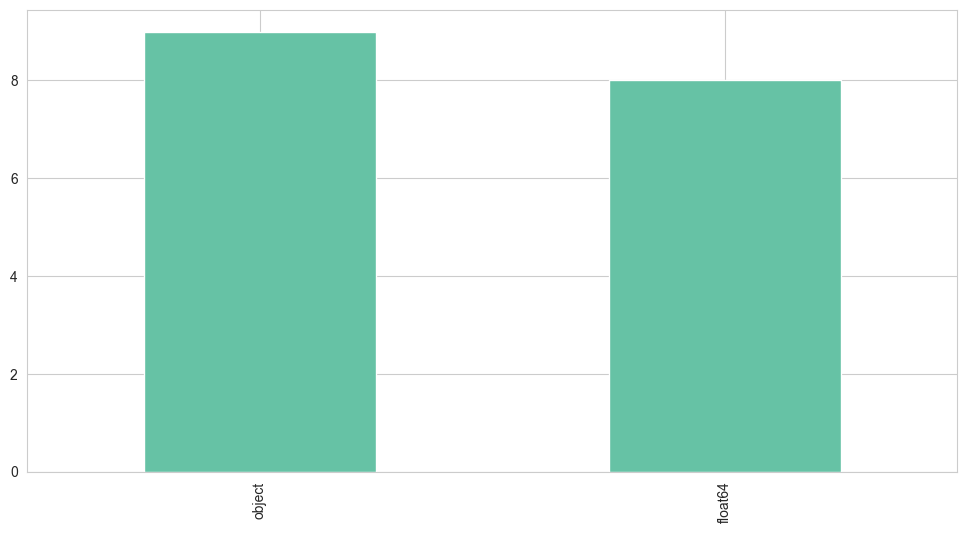

In [32]:
df.dtypes.value_counts().plot(kind='bar')

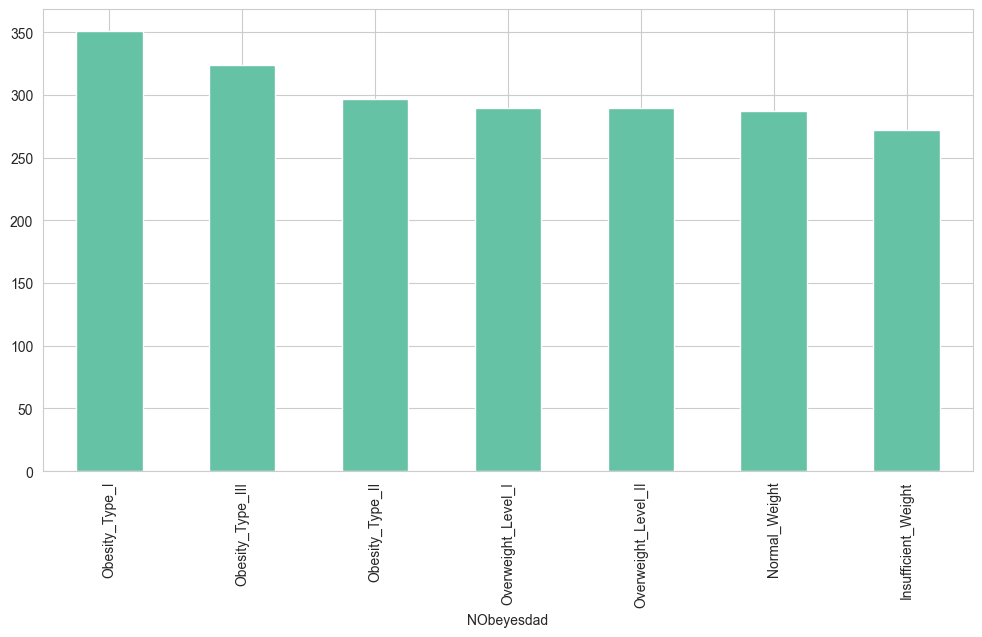

In [33]:
df['NObeyesdad'].value_counts().plot(kind='bar')
plt.savefig('images/class_distribution.png')

In [34]:
# Count the number of unique labels
len(df['NObeyesdad'].unique())


7

## Data Cleaning and Preprocessing


In [35]:
def transform_y(x):
  if x == 'no' or x=='Female':
    return 0
  else:
    return 1
  
columns_yn = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender']
df[columns_yn] = df[columns_yn].applymap(lambda x: transform_y(x))

C:\Users\tomad\AppData\Local\Temp\ipykernel_8012\2437599637.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columns_yn] = df[columns_yn].applymap(lambda x: transform_y(x))


In [36]:
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_data = encoder.fit_transform(df[['MTRANS', 'CALC', 'CAEC']])
encoded_columns = encoder.get_feature_names_out(input_features=['MTRANS', 'CALC', 'CAEC'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_df

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
df.drop(columns=['MTRANS', 'CALC', 'CAEC'],inplace=True)
df = df.join(encoded_df)

In [38]:
df['NObeyesdad'] = df.pop('NObeyesdad')

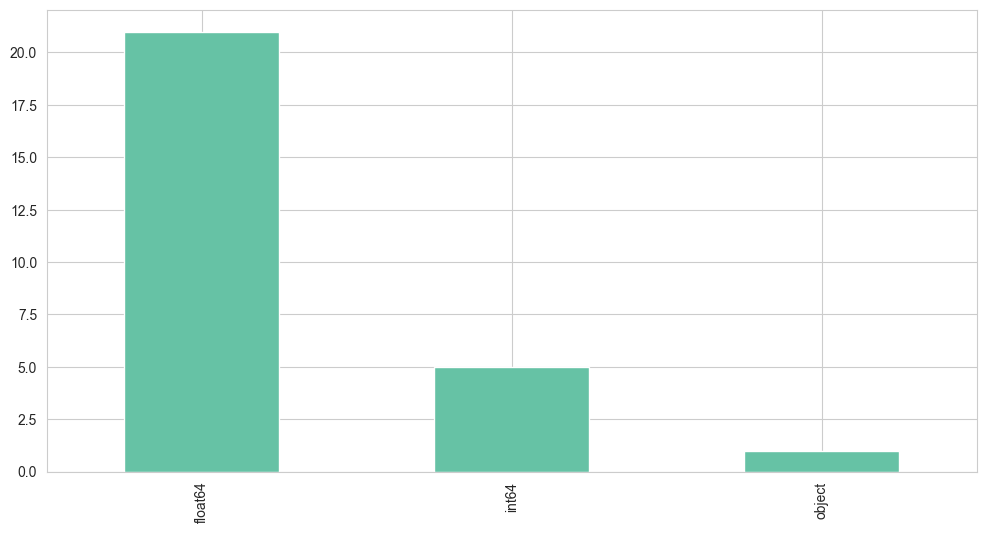

In [39]:
df.dtypes.value_counts().plot(kind='bar')
plt.savefig('images/feature_types.png')

In [40]:
# print which columns are object types
df.select_dtypes(include=['object']).columns

Index(['NObeyesdad'], dtype='object')

In [41]:
# Splitting of the target column
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
X_train, X_vali, y_train, y_vali = train_test_split(X, y, test_size=0.3, random_state=420, stratify=y) 
# Check unique labels in y_train and y_vali
missing_labels = set(y_vali.unique()) - set(y_train.unique())
assert len(missing_labels) == 0, "Labels in y_test not in y_train"

In [43]:
# Checking the shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_vali shape: {X_vali.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_vali shape: {y_vali.shape}')

X_train shape: (1477, 26)
X_vali shape: (634, 26)
y_train shape: (1477,)
y_vali shape: (634,)


### Checking for missing values

In [44]:
# Checking for null values
print(f'Amount null values in X_train: {X_train.isnull().sum().sum()}')
print(f'Amount null values in X_vali: {X_vali.isnull().sum().sum()}')
print(f'Amount null values in y_train: {y_train.isnull().sum().sum()}')
print(f'Amount null values in y_vali: {y_vali.isnull().sum().sum()}')

Amount null values in X_train: 0
Amount null values in X_vali: 0
Amount null values in y_train: 0
Amount null values in y_vali: 0


### Converting target variable to numeric

Converting a categorical variable like this we have (names of people who wrote the review). Would usually result in using One-Hot Encoding, but the column is our target. For most classification algorithms its not necessary to transform our classification problem into a multiclass problem as many classification algorithms (XGboost, DecisionTrees, kNN and SVM) don't intepret a relationship between the labels.

Warning: Methods like neural networks, especially those using softmax intepret relationships between labels.

In [45]:
label_encoder = LabelEncoder()
y_train_temp = label_encoder.fit_transform(y_train)

y_vali_temp = label_encoder.transform(y_vali)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

y_train_numeric_labels = pd.DataFrame(y_train_temp, columns=['NObeyesdad'], index=y_train.index)
y_vali_numeric_labels = pd.DataFrame(y_vali_temp, columns=['NObeyesdad'], index=y_vali.index)

y_train_numeric_labels.head()

,NObeyesdad
793,5
730,0
1283,2
1704,3
240,1


In [46]:
label_mapping.keys()

dict_keys(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])

## Methods

In [47]:
def apply_scaling(X_train, X_vali):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_vali_scaled = scaler.transform(X_vali)

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    df_vali_scaled = pd.DataFrame(X_vali_scaled, columns=X_vali.columns)

    return df_train_scaled, df_vali_scaled

In [48]:
def apply_outlier_removal(X_train, y_train, factor=1.5):
    # Calculate the IQR for each column
    Q1 = np.quantile(X_train, 0.25, axis=0)
    Q3 = np.quantile(X_train, 0.75, axis=0)
    IQR = Q3 - Q1

    # Outlier detection
    outliers = (X_train < Q1 - factor * IQR) | (X_train > Q3 + factor * IQR)

    # The dataset has many columns with outliers, 
    # so we will remove rows where the number of 
    # outliers exceeds 10% of the total number of columns
    threshold = max(1, int(0.1 * X_train.shape[1]))
    rows_to_remove = outliers.sum(axis=1) >= threshold

    # Only remove rows where the number of outliers exceeds the maximum
    X_clean = X_train[~rows_to_remove]
    y_clean = y_train[~rows_to_remove]

    return X_clean, y_clean

In [49]:
def calculate_optimal_pca(X_train):
    pca = PCA()
    pca.fit(X_train)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # plt.figure()
    # plt.plot(explained_variance)
    # plt.xlabel('Number of Components')
    # plt.ylabel('Variance (%)')
    # plt.title('Explained Variance')
    # plt.grid(True)
    # plt.show()

    n_components = np.where(explained_variance > 0.95)[0][0] + 1
    return n_components

In [50]:
def apply_pca(X_train, X_vali, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_vali_pca = pca.transform(X_vali)

    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    X_vali_pca = pd.DataFrame(data=X_vali_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return X_train_pca, X_vali_pca

## Modeling

In [51]:
# Main experiment function
def run_experiment(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    if remove_outliers:
        X_train, y_train = apply_outlier_removal(X_train, y_train) 
        assert X_train.shape[0] == y_train.shape[0], "X_train and y_train should have the same amount of rows"
        assert X_train.shape[0] > 0, "X_train has no rows left"

    if scale_data:
        X_train, X_vali = apply_scaling(X_train, X_vali)

    if use_pca:
        n_components = calculate_optimal_pca(X_train)
        X_train, X_vali = apply_pca(X_train, X_vali, n_components)

    prediction = algorithm_func.fit(X_train, y_train).predict(X_vali)

    conf_matrix = confusion_matrix(y_vali, prediction)

    metrics = {
        'accuracy': accuracy_score(prediction, y_vali),
        'precision': precision_score(prediction, y_vali, average='macro', zero_division=1),
        'recall': recall_score(prediction, y_vali, average='macro', zero_division=1),
        'f1': f1_score(prediction, y_vali, average='macro')
    }
    return metrics, conf_matrix

In [52]:
from sklearn.model_selection import KFold

def run_experiment_with_changes_cv(X_train, X_vali, y_train, y_vali, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    # Concatenate the training and validation sets
    X_train = pd.concat([X_train, X_vali])
    y_train = np.concatenate([y_train, y_vali])

    # Initialize KFold cross-validation
    kfold = KFold(n_splits=5)

    # Initialize a overall confusion matrix based on the number of classes
    unique_classes = np.unique(y_train)
    overall_confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))


    results_per_fold = []

    # Perform cross-validation
    for train_index, vali_index in kfold.split(X_train):
        # Split the training data into training and validation sets
        X_train_cv, X_vali_cv = X_train.iloc[train_index], X_train.iloc[vali_index]
        y_train_cv, y_vali_cv = y_train[train_index], y_train[vali_index]

        # Apply outlier removal if necessary
        if remove_outliers:
            X_train_cv, y_train_cv = apply_outlier_removal(X_train_cv, y_train_cv)
            assert X_train_cv.shape[0] == y_train_cv.shape[0], "X_train and y_train should have the same amount of rows"
            assert X_train_cv.shape[0] > 0, "X_train has no rows left"

        # Apply scaling if necessary
        if scale_data:
            X_train_cv, X_vali_cv = apply_scaling(X_train_cv, X_vali_cv)

        # Apply PCA if necessary
        if use_pca:
            n_components = calculate_optimal_pca(X_train_cv)
            X_train_cv, X_vali_cv = apply_pca(X_train_cv, X_vali_cv, n_components=n_components)

        # Initialize GridSearchCV with the estimator returned by algorithm_func
        prediction = algorithm_func.fit(X_train_cv, y_train_cv).predict(X_vali_cv)

        overall_confusion_matrix += confusion_matrix(y_vali_cv, prediction)

        metrics = {
            'accuracy': accuracy_score(prediction, y_vali_cv),
            'precision': precision_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'recall': recall_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'f1': f1_score(prediction, y_vali_cv, average='macro')
        }
        results_per_fold.append(metrics)

    cv_results_df = pd.DataFrame(results_per_fold)
    # just return the mean for every metric
    mean_metrics = cv_results_df.mean().to_dict()

    return mean_metrics, overall_confusion_matrix

In [53]:
from sklearn.model_selection import ParameterGrid
import time
results = []

param_grid = {
    'decision_tree_classifier': list(ParameterGrid({
        'max_depth': [10, 50, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    })),
    'svm_classifier': list(ParameterGrid({
        'C': [0.01, 1, 10],
        'kernel': ['linear'],
    })),
    'knn_classifier': list(ParameterGrid({
        'n_neighbors': [3, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'minkowski']
    }))
}

algorithms = {
        'decision_tree_classifier': DecisionTreeClassifier(),
        'svm_classifier': SVC(),
        'knn_classifier': KNeighborsClassifier()
    }

for algorithm_key, algorithm in algorithms.items():
    print(f'Starting with {algorithm_key}...')
    if algorithm_key in param_grid:
        for use_pca in [True, False]:
            for scale_data in [True, False]:
                for remove_outliers in [True, False]:
                    for validation_method in ['cross_validation', 'holdout']:

                        print(f'Running {algorithm_key} with use_pca={use_pca}, scale_data={scale_data}, remove_outliers={remove_outliers}, validation_method={validation_method}...')
                        if validation_method == 'holdout':
                            default_algorithm = type(algorithm)()
                            start_time = time.time()
                            metrics, conf_matrix = run_experiment(
                                X_train, 
                                X_vali, 
                                y_train_numeric_labels.iloc[:, 0].values, 
                                y_vali_numeric_labels.iloc[:, 0].values,
                                algorithm, 
                                use_pca, 
                                remove_outliers, 
                                scale_data
                            )
                            end_time = time.time()
                            results.append({
                            'algorithm': algorithm_key,
                            'validation_method': validation_method,
                            'remove_outliers': remove_outliers,
                            'scale_data': scale_data,
                            'use_pca': use_pca,
                            'params': 'default',
                            'time': end_time - start_time,
                            'conf_matrix': conf_matrix.tolist(), # Convert to list to be able to serialize to JSON
                            **metrics
                            })
                        elif validation_method == 'cross_validation':
                            # loop over the parameters for the current algorithm
                            for param in param_grid[algorithm_key]:
                                algorithm.set_params(**param)
                                start_time = time.time()
                                mean_metrics, conf_matrix = run_experiment_with_changes_cv(
                                    X_train, 
                                    X_vali, 
                                    y_train_numeric_labels.iloc[:, 0].values, 
                                    y_vali_numeric_labels.iloc[:, 0].values, 
                                    algorithm,  # Pass the algorithm instance, not the string
                                    use_pca, 
                                    remove_outliers, 
                                    scale_data
                                )
                                end_time = time.time()
                                results.append({
                                    'algorithm': algorithm_key,
                                    'validation_method': validation_method,
                                    'remove_outliers': remove_outliers,
                                    'scale_data': scale_data,
                                    'use_pca': use_pca,
                                    'params': param,
                                    'time': end_time - start_time,
                                    'conf_matrix': conf_matrix.tolist(),
                                    **mean_metrics
                                })
    print('\n\n')

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

Starting with decision_tree_classifier...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove

In [1]:
results_df.sort_values(by='accuracy', ascending=False)

NameError: name 'results_df' is not defined

In [2]:
# plot the confusion matrix of the best model
print(results_df.iloc[0])
conf_matrix = np.array(results_df.iloc[0]['conf_matrix'])
conf_matrix = pd.DataFrame(conf_matrix, index=label_mapping.keys(), columns=label_mapping.keys())
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('images/confusion_matrix.png')

NameError: name 'results_df' is not defined

In [3]:
# save as csv
results_df.to_csv('results.csv', index=False)

NameError: name 'results_df' is not defined

In [4]:
results_df[results_df['validation_method'] == 'cross_validation'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

NameError: name 'results_df' is not defined

In [5]:
results_df[results_df['validation_method'] == 'holdout'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

NameError: name 'results_df' is not defined

In [6]:
# plot the performance measures in comparision to each other
# TODO: Festlegung auf einen Score (f1)
sns.barplot(data=results_df, x='algorithm', y='f1', hue='validation_method', errorbar=None)
plt.title('f1')
plt.savefig('images/f1.png')

NameError: name 'sns' is not defined

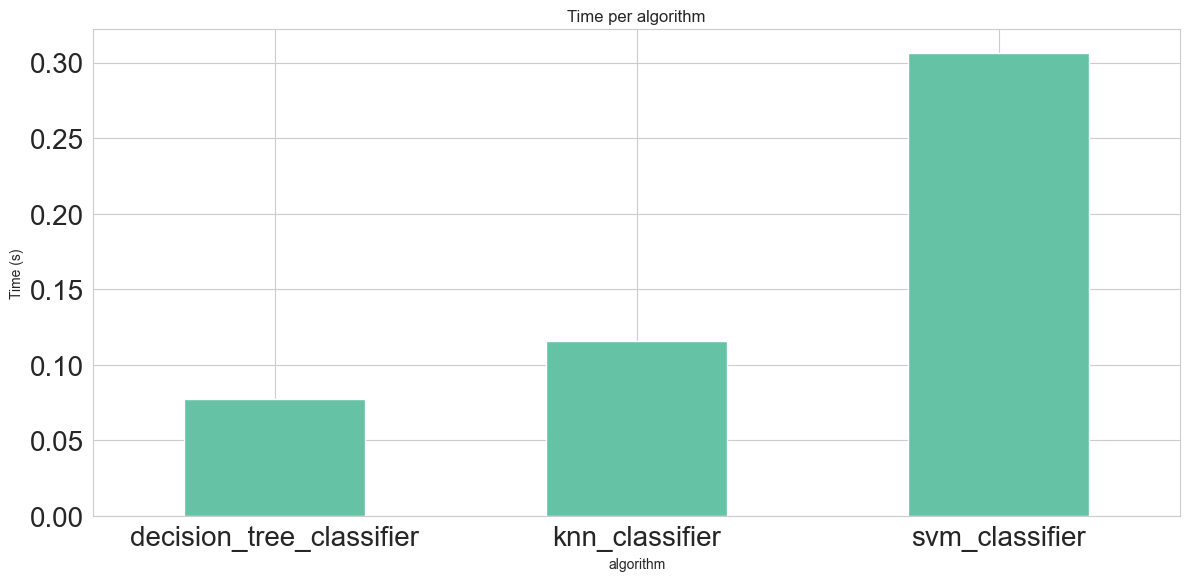

In [85]:
# plot the time difference between the models
results_df['time'] = results_df['time'].astype('float64')
results_df.groupby('algorithm')['time'].mean().plot(kind='bar')
plt.ylabel('Time (s)')
plt.xticks(rotation=0, ha='center')
# make text bigger
plt.gcf().axes[0].tick_params(labelsize=20)
# also make the other text bigger
plt.title('Time per algorithm', fontsize=20)
plt.tight_layout()
plt.title('Time per algorithm')
plt.savefig('images/time.png')

In [ ]:
# plot the a correlation matrix about the parameters and the performance measures against the f1 score
results_df['time'] = results_df['time'].astype('float64')
results_df['f1'] = results_df['f1'].astype('float64')
results_df['accuracy'] = results_df['accuracy'].astype('float64')
results_df['precision'] = results_df['precision'].astype('float64')
results_df['recall'] = results_df['recall'].astype('float64')
sns.heatmap(results_df.corr(), annot=True, fmt='.2f')
plt.savefig('images/correlation_matrix_metrics.png')